In [23]:
# 1. Import the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [24]:
# 2. Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LP 5/boston_housing.csv')
df.head()

# 3. Splitting the data into features and target
X = df.drop(['MEDV'], axis=1)
y = df['MEDV']

In [25]:
# 4. Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Normalization of features using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# 6. Checking the no. of features for model
print(f"No. of features = {len(X.columns)}")

No. of features = 13


In [26]:
# 7. Defining the model
model = Sequential([
    Input((13, )),
    Dense(128, activation='relu', name='dense_1'),
    Dense(64, activation='relu', name='dense_2'),
    Dense(1, activation='linear', name='output'),
])

# 8. Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# 9. Model Summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,113 (39.50 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# 10. Training the model
# from tensorflow.keras.callbacks import EarlyStopping
# early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=50, validation_split=0.05, verbose=1)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 591.0974 - mae: 22.5250 - val_loss: 499.3497 - val_mae: 20.8414
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 549.2221 - mae: 21.5345 - val_loss: 447.4042 - val_mae: 19.5630
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 507.3003 - mae: 20.4578 - val_loss: 364.3407 - val_mae: 17.3089
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 419.1418 - mae: 17.7049 - val_loss: 244.8841 - val_mae: 13.3737
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 264.3374 - mae: 13.2230 - val_loss: 125.9621 - val_mae: 8.4934
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 173.4725 - mae: 10.3785 - val_loss: 76.5338 - val_mae: 7.0600
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 147.6668 - mae: 9.6537 - val_loss: 71.9858 - val_mae: 6.9358
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 121.8235 - mae: 8.7587 - val_loss: 64.5673 - val_mae: 6.2194
Epoch 9/50
12/12 ━━━━━━━━━━━━━━

In [28]:
# 11. Model Evaluation on test data
mse, mae = model.evaluate(x_test, y_test)
print(f"MSE: {mse}")
print(f"MAE: {mae}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 13.7095 - mae: 2.4085
MSE: 19.90058708190918
MAE: 2.757338523864746


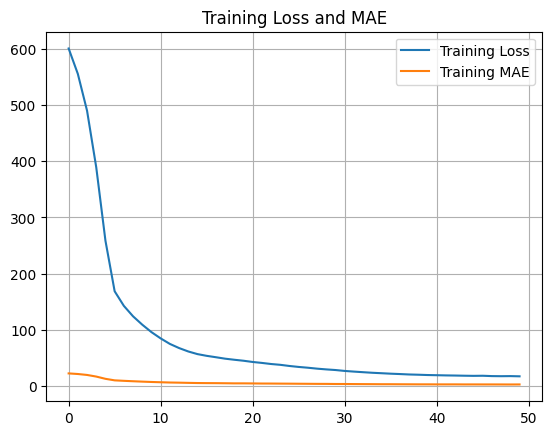

In [29]:
# 12. Plotting Training vs Validation Metrics
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['mae'], label='Training MAE')
plt.title('Training Loss and MAE')
plt.grid(True)
plt.legend()
plt.show()

---

### 🔹 **Block 1: Import Libraries**

```python
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
```

* `numpy` and `pandas`: For numerical operations and data handling.
* `train_test_split`: Splits the dataset into training and testing sets.
* `Sequential`: Keras model type where layers are stacked one after the other.
* `Dense`, `Input`: Neural network layers:

  * `Input`: defines the input shape.
  * `Dense`: a fully connected layer (each neuron connects to all in the next layer).

---

### 🔹 **Block 2: Load Dataset**

```python
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LP 5/boston_housing.csv')
df.head()
```

* Loads the **Boston Housing dataset** from a CSV file into a DataFrame `df`.
* `df.head()` shows the first 5 rows to verify data is loaded properly.
* The dataset typically contains **13 features** (e.g., crime rate, number of rooms, etc.) and one target (`MEDV`: Median house price in \$1000s).

---

### 🔹 **Block 3: Split Features and Target**

```python
X = df.drop(['MEDV'], axis=1)
y = df['MEDV']
```

* `X`: all columns except `'MEDV'` → the **input features**.
* `y`: the `'MEDV'` column → the **target variable** (what you want to predict).

---

### 🔹 **Block 4: Train-Test Split**

```python
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

* Splits the data into:

  * 80% for training
  * 20% for testing
* `random_state=42` ensures reproducibility (same split every time).

---

### 🔹 **Block 5: Feature Normalization**

```python
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
```

* Neural networks work better when input features are on the **same scale**.
* `MinMaxScaler` scales features to a range of **\[0, 1]**.

  * `fit_transform`: calculates min/max on training data and scales it.
  * `transform`: uses the same scale on test data.

---

### 🔹 **Block 6: Feature Count Check**

```python
print(f"No. of features = {len(X.columns)}")
```

* Confirms number of input features (should be 13 for this dataset).

---

### 🔹 **Block 7: Model Definition**

```python
model = Sequential([
    Input((13, )),
    Dense(128, activation='relu', name='dense_1'),
    Dense(64, activation='relu', name='dense_2'),
    Dense(1, activation='linear', name='output'),
])
```

* A **fully connected feedforward neural network** with:

  * Input layer: expects 13 features.
  * Dense Layer 1: 128 neurons, ReLU activation.
  * Dense Layer 2: 64 neurons, ReLU activation.
  * Output Layer: 1 neuron, linear activation (used for regression).
* This structure is typical for **regression problems**.

---

### 🔹 **Block 8: Compile Model**

```python
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
```

* `optimizer='adam'`: Adaptive optimizer combining RMSprop + momentum.
* `loss='mean_squared_error'`: Common regression loss; penalizes large errors.
* `metrics=['mae']`: Tracks Mean Absolute Error during training.

---

### 🔹 **Block 9: Model Summary**

```python
model.summary()
```

* Prints a summary of the model:

  * Layer names
  * Output shapes
  * Number of trainable parameters

---

### 🔹 **Block 10: Train Model**

```python
history = model.fit(x_train, y_train, epochs=50, validation_split=0.05, verbose=1)
```

* Trains the model on training data.
* `epochs=50`: passes over the training set 50 times.
* `validation_split=0.05`: uses 5% of training data to validate performance during training.
* `verbose=1`: shows training progress.

*Note:* `EarlyStopping` is commented out — useful for avoiding overfitting by stopping early when validation loss stops improving.

---

### 🔹 **Block 11: Evaluate Model**

```python
mse, mae = model.evaluate(x_test, y_test)
print(f"MSE: {mse}")
print(f"MAE: {mae}")
```

* Evaluates the model on **unseen test data**.
* Returns:

  * `mse`: how far predictions are from actual values (squared error).
  * `mae`: average absolute error — more interpretable in dollars.

---

### 🔹 **Block 12: Plot Training History**

```python
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['mae'], label='Training MAE')
plt.title('Training Loss and MAE')
plt.grid(True)
plt.legend()
plt.show()
```

* Visualizes:

  * Loss (MSE) during training
  * MAE (how far off predictions were)
* Helps track model **learning progress** and detect **overfitting** (if MAE plateaus or diverges).

---

### 🔍 Terminology Deep Dive:

| Term                             | Meaning                                                                                  |
| -------------------------------- | ---------------------------------------------------------------------------------------- |
| **Epoch**                        | One complete pass through the training dataset.                                          |
| **Batch**                        | A subset of the training data processed before updating model weights.                   |
| **ReLU (Rectified Linear Unit)** | Activation function: `f(x) = max(0, x)`, helps with non-linearity.                       |
| **Dense Layer**                  | Fully connected layer where every neuron connects to all inputs from the previous layer. |
| **MSE**                          | Penalizes larger errors more heavily (used in regression).                               |
| **MAE**                          | Average of absolute differences — easier to interpret.                                   |
| **Normalization**                | Scaling features to a standard range (like 0–1) to improve model performance.            |
| **Validation Split**             | Portion of the training set held out to validate performance during training.            |

---

Let me know if you’d like to plot predictions vs actual values too — that’s great for regression analysis!
